In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df_2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2895 non-null   int64  
 1   MSZoning       2895 non-null   object 
 2   LotFrontage    2895 non-null   float64
 3   LotArea        2895 non-null   int64  
 4   Street         2895 non-null   object 
 5   LotShape       2895 non-null   object 
 6   LandContour    2895 non-null   object 
 7   Utilities      2895 non-null   object 
 8   LotConfig      2895 non-null   object 
 9   LandSlope      2895 non-null   object 
 10  Neighborhood   2895 non-null   object 
 11  Condition1     2895 non-null   object 
 12  Condition2     2895 non-null   object 
 13  BldgType       2895 non-null   object 
 14  HouseStyle     2895 non-null   object 
 15  OverallQual    2895 non-null   int64  
 16  OverallCond    2895 non-null   int64  
 17  YearBuilt      2895 non-null   int64  
 18  YearRemo

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Data to be predicted
df_to_predict = df[df['SalePrice'].isnull()]
df_to_predict = df_to_predict.drop(['SalePrice'], axis = 1)

In [7]:
df = df.dropna()

In [8]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.impute import  SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

# 4. for modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline,  FeatureUnion

# 5. for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

#6. for models

# regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from time import time
import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Function to find the best model
def find_best_model(X_train, y_train, X_test, y_test):
    best_model = None
    best_r2 = 0.0

    models = {
        'Linear Regression': (LinearRegression(), {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [None, -1]
    }),
    # 'Random Forest': (RandomForestRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [None, 10, 20, 30],
    #     'min_samples_split': [2, 5, 10],
    #     'min_samples_leaf': [1, 2, 4]
    # }),
    # 'Decision Tree': (DecisionTreeRegressor(), {
    #     'max_depth': [None, 10, 20, 30],
    #     'min_samples_split': [2, 5, 10],
    #     'min_samples_leaf': [1, 2, 4]
    # }),
    # 'Gradient Boosting': (GradientBoostingRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.001, 0.01, 0.1, 1],
    #     'max_depth': [3, 5, 7]
    # }),
    # 'Ada Boost': (AdaBoostRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.001, 0.01, 0.1, 1]
    # }),
    'SVM': (SVR(), {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    # 'KNN': (KNeighborsRegressor(), {
    #     'n_neighbors': [3, 5, 7],
    #     'weights': ['uniform', 'distance'],
    #     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    # }),
    # 'Extra Gradient': (ExtraTreesRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [None, 10, 20, 30],
    #     'min_samples_split': [2, 5, 10],
    #     'min_samples_leaf': [1, 2, 4]
    # }),
    # 'Bagging': (BaggingRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'max_samples': [1.0, 0.8, 0.6],
    #     'max_features': [1.0, 0.8, 0.6]
    # }),
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'max_depth': [3, 5, 7, 10],
        'gamma': [0, 0.1, 0.2, 0.3]
    }),
    # 'Light GBM': (LGBMRegressor(), {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.001, 0.01, 0.1, 1],
    #     'max_depth': [3, 5, 7]
    # }),
    # 'CatBoost': (CatBoostRegressor(verbose=False), {
    #     'n_estimators': [50, 100, 200],
    #     'learning_rate': [0.001, 0.01, 0.1, 1],
    #     'depth': [4, 6, 8, 10]
    # })
        
    }

    for name, (model, params) in models.items():
        try:
            grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
            grid_search.fit(X_train, y_train)

            # Evaluate the model on the test set
            y_pred = grid_search.best_estimator_.predict(X_test)
            r2 = r2_score(y_test, y_pred)

            # Print performance metrics
            print("Model:", name)
            print("Cross-validation Accuracy:", grid_search.best_score_)
            print("Test Accuracy:", r2)
            print("\n_________________________________________________________________________________\n")

            # Check if the current model has the best accuracy
            if r2 > best_r2:
                best_r2 = r2
                best_model_name = name
                best_model = grid_search.best_estimator_
        except Exception as e:
            print(f"Error for model {name}: {e}")

    # Return the best model and its test accuracy
    return best_model, best_r2

In [13]:
best_model, test_accuracy = find_best_model(X_train, y_train, X_test, y_test)
print("Best Model:", best_model)
print('Test R2 of the Best Model:', test_accuracy * 100)

Model: Linear Regression
Cross-validation Accuracy: -7.758437849816224e+20
Test Accuracy: -5.5306997310831414e+20

_________________________________________________________________________________

Model: SVM
Cross-validation Accuracy: 0.6675891775887621
Test Accuracy: 0.7291774527526422

_________________________________________________________________________________

Model: XGBoost
Cross-validation Accuracy: 0.9011766735469436
Test Accuracy: 0.9169147252955414

_________________________________________________________________________________

Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_thr

In [14]:
final_model = XGBRegressor()

In [15]:
final_model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
final_model.score(X,y)

0.9994738939610941

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [19]:
scores = cross_validate(final_model,X,y,
                         scoring=['neg_mean_absolute_error','neg_root_mean_squared_error',
                                  'neg_mean_squared_error', 'max_error'],cv=5)

In [20]:
y_pred = cross_val_predict(final_model, X, y, cv=10)

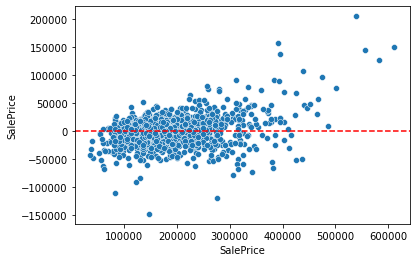

In [21]:
test_residuals = y - y_pred
sns.scatterplot(x=y, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

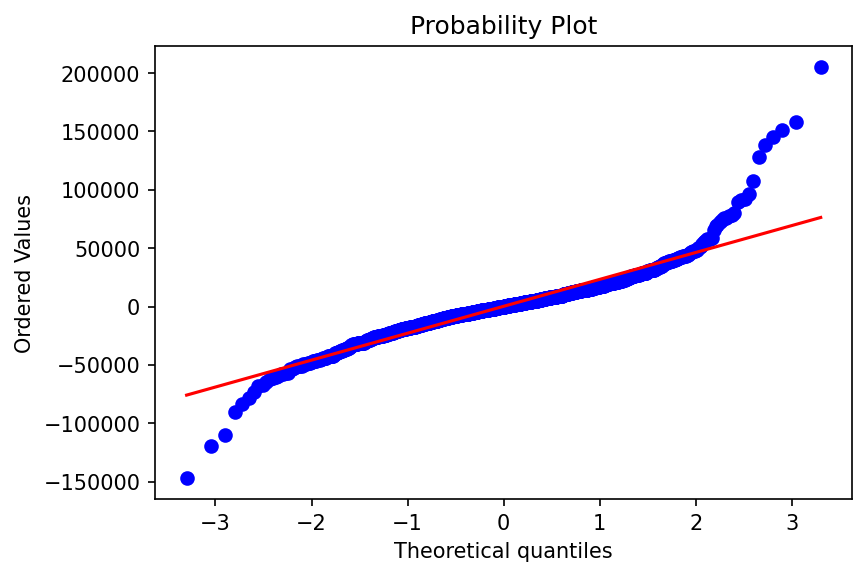

In [22]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4),dpi=150)
_ = sp.stats.probplot(test_residuals,plot=ax);

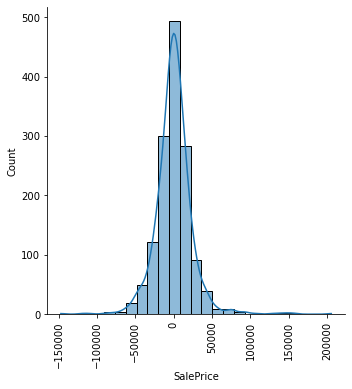

In [23]:
sns.displot(test_residuals, bins=25, kde=True)
plt.xticks(rotation=90);

In [24]:
test_residuals.sort_values()

1302   -147196.125000
260    -119463.031250
620    -109951.750000
1326    -90383.750000
653     -83329.312500
            ...      
759     138366.843750
1030    145055.812500
883     151251.343750
675     157877.921875
754     205504.125000
Name: SalePrice, Length: 1436, dtype: float64

In [25]:
test = pd.read_csv('test.csv')

In [26]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [27]:
result = final_model.predict(df_to_predict)

In [28]:
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':result})

In [29]:
submission['SalePrice'] = submission['SalePrice'].astype(int)
print(submission.shape)

(1459, 2)


In [30]:
filename = 'house_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: house_preds.csv
